## Data Cleansing

First, we need to import required packages and datasets:

In [1]:
import pandas as pd

In [2]:
trip_data_2024_03 = pd.read_csv(r"annual_divvy_trips\raw_data\202403-divvy-tripdata.csv")
trip_data_2024_04 = pd.read_csv(r"annual_divvy_trips\raw_data\202404-divvy-tripdata.csv")
trip_data_2024_05 = pd.read_csv(r"annual_divvy_trips\raw_data\202405-divvy-tripdata.csv")
trip_data_2024_06 = pd.read_csv(r"annual_divvy_trips\raw_data\202406-divvy-tripdata.csv")
trip_data_2024_07 = pd.read_csv(r"annual_divvy_trips\raw_data\202407-divvy-tripdata.csv")
trip_data_2024_08 = pd.read_csv(r"annual_divvy_trips\raw_data\202408-divvy-tripdata.csv")
trip_data_2024_09 = pd.read_csv(r"annual_divvy_trips\raw_data\202409-divvy-tripdata.csv")
trip_data_2024_10 = pd.read_csv(r"annual_divvy_trips\raw_data\202410-divvy-tripdata.csv")
trip_data_2024_11 = pd.read_csv(r"annual_divvy_trips\raw_data\202411-divvy-tripdata.csv")
trip_data_2024_12 = pd.read_csv(r"annual_divvy_trips\raw_data\202412-divvy-tripdata.csv")
trip_data_2025_01 = pd.read_csv(r"annual_divvy_trips\raw_data\202501-divvy-tripdata.csv")
trip_data_2025_02 = pd.read_csv(r"annual_divvy_trips\raw_data\202502-divvy-tripdata.csv")

#### Combining datasets

For better usage and integrity, it is recommended to combine these datasets into one, single dataset:

In [3]:
trips_mar2024_feb2025 = pd.concat([trip_data_2024_03, trip_data_2024_04, trip_data_2024_05, trip_data_2024_06,
           trip_data_2024_07, trip_data_2024_08, trip_data_2024_09, trip_data_2024_10,
          trip_data_2024_11, trip_data_2024_12, trip_data_2025_01, trip_data_2025_02])

In [4]:
trips_mar2024_feb2025.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5783100 entries, 0 to 151879
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 617.7+ MB


In [5]:
trips_mar2024_feb2025["started_at"] = trips_mar2024_feb2025["started_at"].astype("datetime64[ns]")
trips_mar2024_feb2025["ended_at"] = trips_mar2024_feb2025["ended_at"].astype("datetime64[ns]")
trips_mar2024_feb2025["member_casual"] = trips_mar2024_feb2025["member_casual"].astype("category")

In [6]:
# We store a backup before starting data manipulation
trips_mar2024_feb2025.to_csv(r"annual_divvy_trips\annual_trips\annual_trips_mar2024_feb2025_v01.csv")

#### Cleaning process

It's time to remove duplicates, drop missing values, and add some minor changes to 
our dataset:

In [7]:
# Finding the number of duplicates
trips_mar2024_feb2025.duplicated("ride_id").sum()

np.int64(211)

In [8]:
# Dropping those duplicates
trips_mar2024_feb2025.drop_duplicates("ride_id", inplace = True)

In [9]:
trips_mar2024_feb2025.set_index("ride_id", inplace = True)

In [10]:
# Let's check out how many missing values are in each column
trips_mar2024_feb2025.isna().sum()

rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1080125
start_station_id      1080125
end_station_name      1109995
end_station_id        1109995
start_lat                   0
start_lng                   0
end_lat                  6704
end_lng                  6704
member_casual               0
dtype: int64

In [11]:
# Chech whether we are able to fill those missing values with other information,
# ex. 'start_lat' for 'start_station_name'
# We need at least 1 non-missing value for each 'start_lat' in order to fill other missing values.
trips_mar2024_feb2025.iloc[0]

rideable_type               electric_bike
started_at            2024-03-05 18:33:11
ended_at              2024-03-05 18:51:48
start_station_name                    NaN
start_station_id                      NaN
end_station_name                      NaN
end_station_id                        NaN
start_lat                           41.94
start_lng                          -87.65
end_lat                             41.96
end_lng                            -87.65
member_casual                      member
Name: 64FBE3BAED5F29E6, dtype: object

In [12]:
trips_mar2024_feb2025[trips_mar2024_feb2025["start_lat"] == 41.94].start_station_name.value_counts()

Series([], Name: count, dtype: int64)

In [13]:
# We can not fill missing values, so, we start dropping them:
trips_mar2024_feb2025.dropna(inplace = True)

In [14]:
trips_mar2024_feb2025.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4120453 entries, 391B0EFEC1CE3771 to 91C4E635C5285CE1
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   rideable_type       object        
 1   started_at          datetime64[ns]
 2   ended_at            datetime64[ns]
 3   start_station_name  object        
 4   start_station_id    object        
 5   end_station_name    object        
 6   end_station_id      object        
 7   start_lat           float64       
 8   start_lng           float64       
 9   end_lat             float64       
 10  end_lng             float64       
 11  member_casual       category      
dtypes: category(1), datetime64[ns](2), float64(4), object(5)
memory usage: 381.2+ MB


#### Data Accuracy Check

It is time to make sure our data is accurate:

In [15]:
# Making sure starting time is not later than ending time
trips_mar2024_feb2025["ride_length"] = trips_mar2024_feb2025["ended_at"] - trips_mar2024_feb2025["started_at"]

In [16]:
inaccuracy_count = len(trips_mar2024_feb2025[trips_mar2024_feb2025["ride_length"] < pd.to_timedelta("00:00:00")])
print("We have {} records that contains starting time later than ending time.".format(inaccuracy_count))

We have 38 records that contains starting time later than ending time.


In [17]:
# Making sure our geographical coordinates are accurate and inside Chicago
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

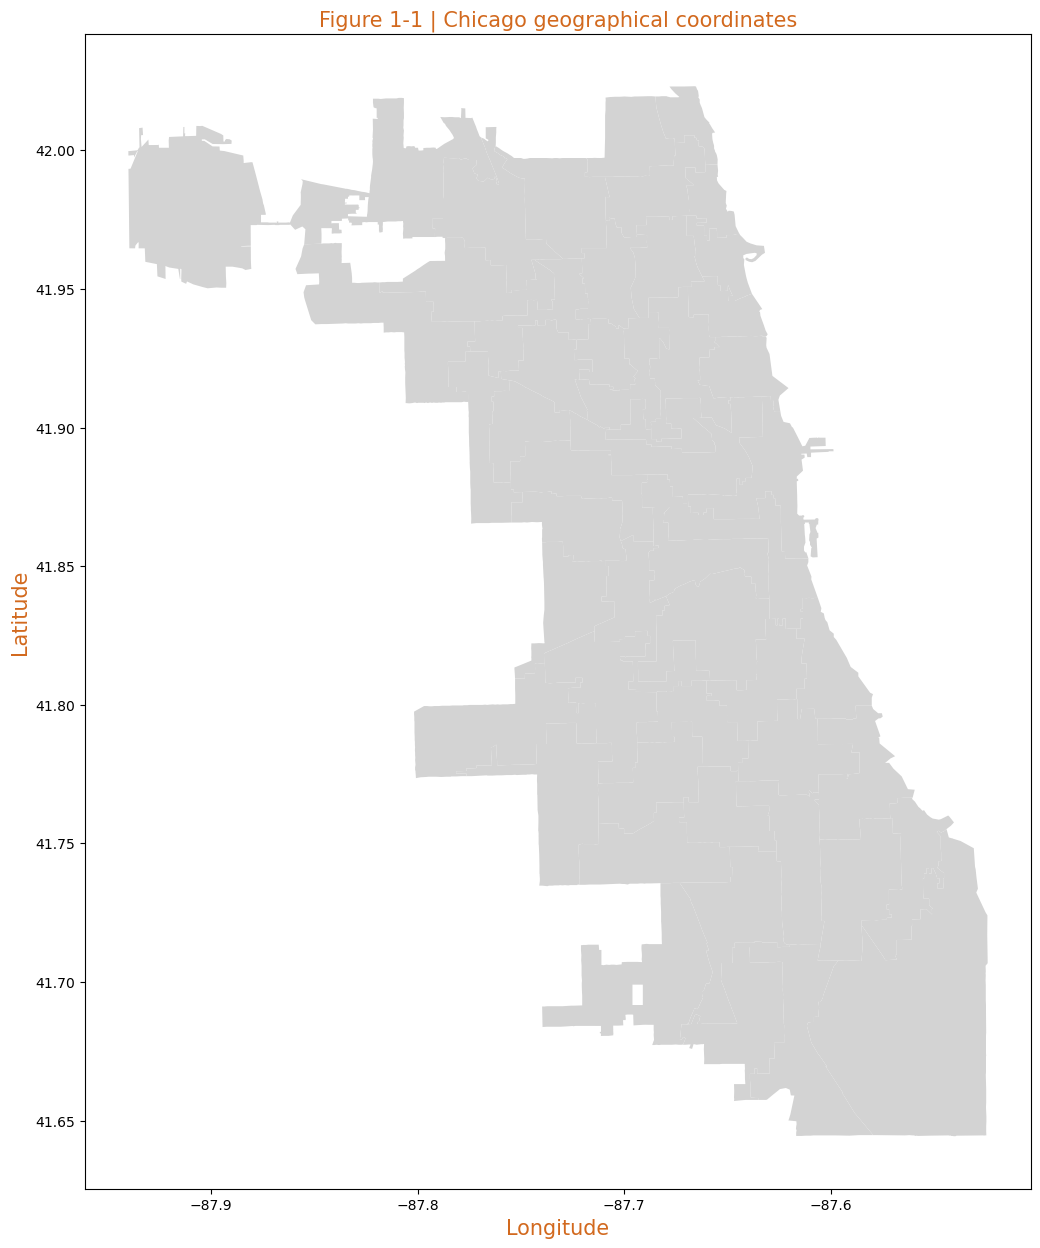

In [18]:
# Defining Chicago boundries using .shp file containing geolocation coordinates of chicago
chicago_boundary = gpd.read_file(r"ward1998\ward1998.shp")
chicago_boundary.plot(figsize = (20, 15), color = "lightgray")
plt.title("Figure 1-1 | Chicago geographical coordinates", fontsize = 15, color = "chocolate")
plt.xlabel("Longitude", fontsize = 15, color = "chocolate")
plt.ylabel("Latitude", fontsize = 15, color = "chocolate")
plt.show()

In [19]:
# Converting start and end geographical integers into coordinates
start_g = [Point(xy) for xy in zip(trips_mar2024_feb2025["start_lng"],
                                   trips_mar2024_feb2025["start_lat"])]
end_g = [Point(xy) for xy in zip(trips_mar2024_feb2025["end_lng"],
                                 trips_mar2024_feb2025["end_lat"])]

In [20]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning)

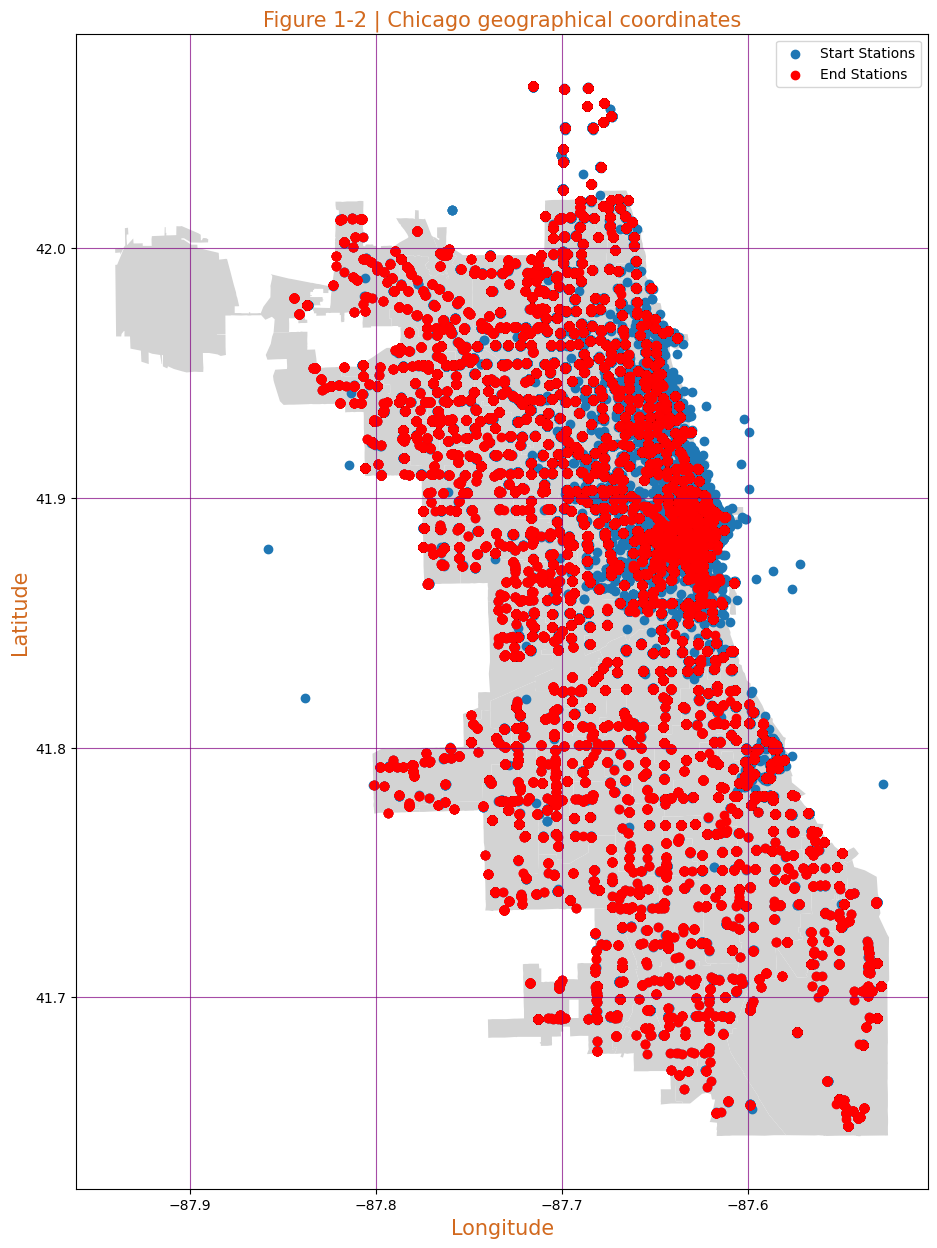

Figure 1-2 | The plot shows that there are some start and end locations that are not inside Chicago and should be eliminated.


In [21]:
chicago_boundary.plot(figsize = (20, 15), color = "lightgray")
plt.scatter(trips_mar2024_feb2025["start_lng"], trips_mar2024_feb2025["start_lat"], label = "Start Stations")
plt.scatter(trips_mar2024_feb2025["end_lng"], trips_mar2024_feb2025["end_lat"], color = "red", label = "End Stations")
plt.title("Figure 1-2 | Chicago geographical coordinates", fontsize = 15, color = "chocolate")
plt.xlabel("Longitude", fontsize = 15, color = "chocolate")
plt.ylabel("Latitude", fontsize = 15, color = "chocolate")
plt.grid(True, color = "purple", alpha = 0.7)
plt.legend()
plt.show()
print("Figure 1-2 | The plot shows that there are some start and end locations that are not inside Chicago and should be eliminated.")

In [22]:
# Eliminating inaccuracies
start_geo = gpd.GeoDataFrame(trips_mar2024_feb2025, geometry=start_g, crs = "EPSG:4269")
end_geo = gpd.GeoDataFrame(trips_mar2024_feb2025, geometry=end_g, crs = "EPSG:4269")

start_filtered = gpd.sjoin(start_geo, chicago_boundary, how="inner", predicate="within")
end_filtered = gpd.sjoin(end_geo, chicago_boundary, how="inner", predicate="within")

In [23]:
trips_mar2024_feb2025_v02 = trips_mar2024_feb2025.loc[start_filtered.index.intersection(end_filtered.index)]

trips_mar2024_feb2025_v02 = trips_mar2024_feb2025_v02[trips_mar2024_feb2025_v02["ride_length"] > pd.to_timedelta("00:00:00")].copy()

In [24]:
# Adding the day_of_week field
trips_mar2024_feb2025_v02["day_of_week"] = trips_mar2024_feb2025_v02["started_at"].dt.dayofweek + 1

In [27]:
# Adding 'length_dif_secs' field to the dataset
trips_mar2024_feb2025_v02['length_dif_secs'] = trips_mar2024_feb2025_v02.ride_length.dt.total_seconds().astype(int)

In [28]:
# Saving the clean file
trips_mar2024_feb2025_v02.to_csv(r"annual_divvy_trips\annual_trips\annual_trips_mar2024_feb2025_v02.csv")